In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

%matplotlib inline 
sns.set(style="ticks")

In [6]:
data = pd.read_csv('googleplaystore.csv', sep=",")

In [7]:
# размер набора данных
data.shape

(10841, 13)

In [8]:
# типы колонок
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [9]:
# проверим есть ли пропущенные значения
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## 1. Обработка пропусков в данных

### удаление или заполнение нулями

In [11]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((10841, 13), (10841, 8))

In [12]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((10841, 13), (9360, 13))

In [15]:
# Заполнение всех пропущенных значений нулями
data_new_3 = data.fillna(0)
data_new_3.shape

(10841, 13)

### Обработка пропусков в категориальных данных

In [23]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
total_count = data.shape[0]
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Type. Тип данных object. Количество пустых значений 1, 0.01%.
Колонка Content Rating. Тип данных object. Количество пустых значений 1, 0.01%.
Колонка Current Ver. Тип данных object. Количество пустых значений 8, 0.07%.
Колонка Android Ver. Тип данных object. Количество пустых значений 3, 0.03%.


In [24]:
cat_temp_data = data[['Android Ver']]
cat_temp_data.head()

,Android Ver
0,4.0.3 and up
1,4.0.3 and up
2,4.0.3 and up
3,4.2 and up
4,4.4 and up


In [25]:
cat_temp_data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [29]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['4.0.3 and up'],
       ['4.0.3 and up'],
       ['4.0.3 and up'],
       ...,
       ['2.2 and up'],
       ['Varies with device'],
       ['Varies with device']], dtype=object)

In [30]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['1.0 and up', '1.5 and up', '1.6 and up', '2.0 and up',
       '2.0.1 and up', '2.1 and up', '2.2 - 7.1.1', '2.2 and up',
       '2.3 and up', '2.3.3 and up', '3.0 and up', '3.1 and up',
       '3.2 and up', '4.0 and up', '4.0.3 - 7.1.1', '4.0.3 and up',
       '4.1 - 7.1.1', '4.1 and up', '4.2 and up', '4.3 and up',
       '4.4 and up', '4.4W and up', '5.0 - 6.0', '5.0 - 7.1.1',
       '5.0 - 8.0', '5.0 and up', '5.1 and up', '6.0 and up',
       '7.0 - 7.1.1', '7.0 and up', '7.1 and up', '8.0 and up',
       'Varies with device'], dtype=object)

In [33]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='None')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['4.0.3 and up'],
       ['4.0.3 and up'],
       ['4.0.3 and up'],
       ...,
       ['2.2 and up'],
       ['Varies with device'],
       ['Varies with device']], dtype=object)

In [34]:
np.unique(data_imp3)

array(['1.0 and up', '1.5 and up', '1.6 and up', '2.0 and up',
       '2.0.1 and up', '2.1 and up', '2.2 - 7.1.1', '2.2 and up',
       '2.3 and up', '2.3.3 and up', '3.0 and up', '3.1 and up',
       '3.2 and up', '4.0 and up', '4.0.3 - 7.1.1', '4.0.3 and up',
       '4.1 - 7.1.1', '4.1 and up', '4.2 and up', '4.3 and up',
       '4.4 and up', '4.4W and up', '5.0 - 6.0', '5.0 - 7.1.1',
       '5.0 - 8.0', '5.0 and up', '5.1 and up', '6.0 and up',
       '7.0 - 7.1.1', '7.0 and up', '7.1 and up', '8.0 and up', 'None',
       'Varies with device'], dtype=object)

In [35]:
data_imp3[data_imp3=='None'].size

3

## 2. Преобразование категориальных признаков в числовые

In [36]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,4.0.3 and up
1,4.0.3 and up
2,4.0.3 and up
3,4.2 and up
4,4.4 and up
5,2.3 and up
6,4.0.3 and up
7,4.2 and up
8,3.0 and up
9,4.0.3 and up


### 2.1. Кодирование категорий целочисленными значениями

In [37]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [38]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [39]:
cat_enc['c1'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [40]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [41]:
le.inverse_transform([0, 1, 2, 3])

array(['1.0 and up', '1.5 and up', '1.6 and up', '2.0 and up'],
      dtype=object)

## 3. Масштабирование данных

In [42]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [44]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Rating']])

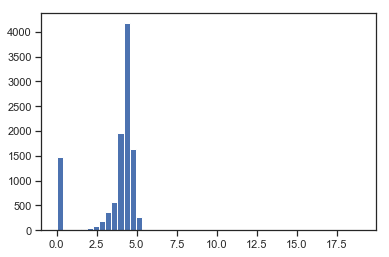

In [47]:
plt.hist(data_new_3['Rating'], 50)
plt.show()

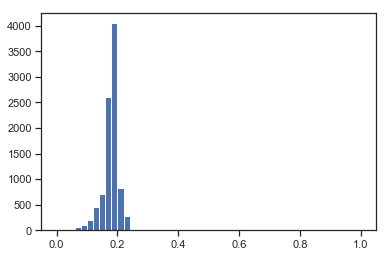

In [48]:
plt.hist(sc1_data, 50)
plt.show()